# NO-SHOW APPOINTMENTS ANALYSIS

## TABLE OF CONTENTS 
- [Introduction](#INTRODUCTION) 
- [Importing Libraries and Loading Dataframes](#IMPORTING-LIBRARIES-AND-LOAGING-DATAFRAMES)
- [Data Wrangling](#DATA-WRANGLING) 
- [Data Cleaning](#DATA-CLEANING) 
- [Data Analysis and Visualization](#DATA-ANALYSIS-AND-VISUALIZATION)
- [Conclusion](#CONCLUSION)
- [Limitations](#LIMITATIONS)

### INTRODUCTION

A person makes a doctor's appointment, recieves all the instructions and doesn't show up for their appointment, WHO IS TO BLAME? 

The dataset collects information from 100K medical appointments in Brazil and is focused on the question 'whether or not patient shows up for their appointments'. The dataset was gooten from kaggle. 

**DATA DICTIONARY**

**PatientId** - Identification of a patient 

**AppointmentID** - Identification of each appointment

**Gender** - Male or Female. Female is the greater proportion, woman takes more care of their health in comparison to men

**ScheduledDay** - The day someone called or registered for the appointment, this is before the apointment

**AppointmentDay** - The day of the actual appointment, when they have to visit the doctor

**Age** - How old is the patient

**Neighbourhood** - Where the appointment takes place

**Scholarship** - True or False (0 - false, 1 - true)

**Hypertension** - True or false 

**Diabetes** - True or false

**Alcoholism** - True or false

**Handicaped** - True or false

**SMS_recieved** - True or false

**No_show** - Yes or No. No means the patient showed up on the appointment day and Yes means the patient did not show up

**KEY QUESTIONS THIS ANALYSIS WOULD BE ANSWERING**

1. Does gender have any impact on how patients show-up?

          Does being diabetic affect how male/female show up?
     
          Does being alcoholic affect how male/female show up?
     
          Does being handicaped affect how male/female show up?
     
          Does recieving SMS affect how male/female show up?
          
2. Does the increase in number of wait days affect how patients show up?

3. Does Age affect how patient shows up?

4. Does being on scholarship increase the chances of a patient showing up?
   
         Do hypertensive patients show up more when they're on scholarship?
   
         Do diabetic patients show up more when they're on scholarship?
   
         Do alcoholic patients show up more when they're on scholarship?
   
         Do handicaped patients show up more when they're on scholarship?
         
5. Does recieving SMS increase the chances of a patient showing up?

6. Does setting appointments on particular days increase the chances of a patient showing up?

### IMPORTING LIBRARIES AND LOAGING DATAFRAMES

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

show_original = pd.read_csv('noshowappointments.csv')

In [73]:
# make a copy of the dataframe to avoid loss

show = show_original.copy()

In [74]:
# preview the dataframe

show.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


### DATA WRANGLING 

In [75]:
show.shape

(110527, 14)

In [76]:
show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset isn't missing any value

The data types of some of the columns are wrong, this would be corrected at the [Data Cleaning](#DATA-CLEANING) section

For readability and analysis purposes, some of the column names would be changed at the [Data Cleaning](#DATA-CLEANING) section 

In [77]:
show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### DATA CLEANING

First, the  PatientId and AppointmentID columns would not be necessary for this analysis, so they would both be dropped

In [78]:
# drop the 2 columns 

show.drop(['PatientId', 'AppointmentID'], inplace = True, axis = 1)

In [79]:
# verify that both columns have been dropped

show.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


Next, change the column names of some of the columns (Handcap, hipertension and no-show)

In [80]:
show.rename(columns = {'Handcap': 'Handicap', 'Hipertension': 'Hypertension', 'No-show': 'No_show'}, inplace = True)

In [81]:
# verify that the change has occured

show.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


Now, for the unique values for some of the columns 

In [82]:
# print unique values of some columns 
print("Unique Values in `Gender` => {}".format(show.Gender.unique()))
print("Unique Values in `Age` => {}".format(show.Age.unique()))
print("Unique Values in `Scholarship` => {}".format(show.Scholarship.unique()))
print("Unique Values in `Hypertension` => {}".format(show.Hypertension.unique()))
print("Unique Values in `Diabetes` => {}".format(show.Diabetes.unique()))
print("Unique Values in `Alcoholism` => {}".format(show.Alcoholism.unique()))
print("Unique Values in `Handicap` => {}".format(show.Handicap.unique()))
print("Unique Values in `SMS_received` => {}".format(show.SMS_received.unique()))
print("Unique Values in `No_show` => {}".format(show.No_show.unique()))

Unique Values in `Gender` => ['F' 'M']
Unique Values in `Age` => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
Unique Values in `Scholarship` => [0 1]
Unique Values in `Hypertension` => [1 0]
Unique Values in `Diabetes` => [0 1]
Unique Values in `Alcoholism` => [0 1]
Unique Values in `Handicap` => [0 1 2 3 4]
Unique Values in `SMS_received` => [0 1]
Unique Values in `No_show` => ['No' 'Yes']


We can see that one of the age in the Age column is '-1'. This is not normal. I'll look deeply into it to see what's wrong 

In [83]:
#show the column(s) where the Age is '-1'

age_error = show.query('Age == -1')
age_error

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


There is just one row where the age is -1. The row can be dropped 

In [84]:
# drop the row

show.drop(99832, inplace = True)

In [85]:
# verifying that the row has been dropped 

show.shape

(110526, 12)

The number of rows reduced by one so it has been dropped

Now, change the datatypes of some of the columns (ScheduledDay, AppointmentDay, Gender and No_show )

In [86]:
show['ScheduledDay'] = pd.to_datetime(show['ScheduledDay']).dt.date.astype('datetime64[ns]')
show['AppointmentDay'] = pd.to_datetime(show['AppointmentDay']).dt.date.astype('datetime64[ns]')
show['Gender'] = show['Gender'].astype("category")
show['No_show'] = show['No_show'].astype("category")

From the dataset's description on kaggle, it can be seen that Handicap column should have 2 distinct values (1 and 0), but from the unique values we can see that Handicap has 4 unique values. Let's check the distribution of these values

In [87]:
show['Handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

Now that we can see that '0' is a lot greater than the rest, it's safe to assume that '1,2,3 and 4' are different types of handicaps i.e(dumb, blind etc). We can group them together as one, being handicaped.

In [88]:
show['Handicap'] = show['Handicap'].apply(lambda x:0 if x == 0 else 1)

In [89]:
# to verify 

show['Handicap'].value_counts()

0    108285
1      2241
Name: Handicap, dtype: int64

Now, I'll introduce a new column (WaitDays). This would tell us the number of days the patient had to wait after the scheduled day for the appointment day. The aim is to know if there is a trend of them showing up on time (or not) if the number of days they wait is long.

In [90]:
# create a column for WaitDays

show['WaitDays'] = show['AppointmentDay'] - show['ScheduledDay']
show['WaitDays'] = show['WaitDays'].dt.days

In [91]:
show.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitDays
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0


In [92]:
show['WaitDays'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123], dtype=int64)

We can see that there is '-6' and '-1', this doesn't seem right, let's look into it further

In [93]:
waitdays_error = show.query('WaitDays < 0')
waitdays_error

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitDays
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


Now, let's drop these rows

In [94]:
show.drop(show[show.WaitDays < 0].index, inplace=True)

In [95]:
#verify that they have been deleted

show.query('WaitDays < 0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitDays


A new column, 'Appointment_DOW' would also be created, this column would contain the days of the Week which the appointment were held. This would help in our analysis. 

In [96]:
#create a column for appointment day of the week 

show['Appointment_DOW'] = show['AppointmentDay'].dt.day_name()

Now, let's check the minimum and maximum of all columns. This would help make our analysis easier

In [125]:
pd.DataFrame({"min":show.min(), "max":show.max()})

C:\Users\User\AppData\Local\Temp\ipykernel_22892\4120270418.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame({"min":show.min(), "max":show.max()})


,min,max
ScheduledDay,2015-11-10 00:00:00,2016-06-08 00:00:00
AppointmentDay,2016-04-29 00:00:00,2016-06-08 00:00:00
Age,0,115
Neighbourhood,AEROPORTO,VILA RUBIM
Scholarship,0,1
Hypertension,0,1
Diabetes,0,1
Alcoholism,0,1
Handicap,0,1
SMS_received,0,1


In [98]:
show.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitDays,Appointment_DOW
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday


Now the dataset looks pretty clean. It's time for the analysis and visualization :)

### DATA ANALYSIS AND VISUALIZATION

**Does gender have any impact on how patients show up?**

First, let's look at the percentage of male to female to avoid being biased in our analysis

In [99]:
female_size = show.groupby(['Gender']).size()["F"]/(show.groupby(['Gender']).size()["F"]+show.groupby(['Gender']).size()["M"])
male_size = show.groupby(['Gender']).size()["M"]/(show.groupby(['Gender']).size()["F"]+show.groupby(['Gender']).size()["M"]) 

In [100]:
print("Percent of Male Patients` => {:.2f}%".format(female_size*100))
print("Percent of Female Patients` => {:.2f}%".format(male_size*100))

Percent of Male Patients` => 65.00%
Percent of Female Patients` => 35.00%


The number of females are a lot higher than that of males. So we have to take that into consideration during the analysis

Now, let's see the ratio of Males and Females that showed up for their appointment to the ones that did not.

In [101]:
#defining a function for all plots with tick labels 
def plotting(x, titlename):
    gen = sns.countplot(x, hue = show.No_show, data = show)
    gen.set_title(titlename)
    gen.set_xticklabels(x_ticks_labels)
    plt.show()
    return gen

C:\Users\User\anaconda3\envs\portfolio_projects\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


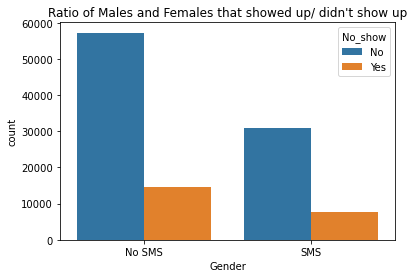

In [102]:
#calling the function we defined earlier to see the ratio of the males and females that showed up

plotting(show.Gender, "Ratio of Males and Females that showed up/ didn't show up")
x_ticks_labels=['Female', 'Male']

From the visualization, the ratio of female that showed up compared to the total number of female isn't significantly different from the ratio of males that showed up compared to the total number of males. lets go a bit deeper in the Gender analysis 

Lets see the impact diabeties has on the male and female with respect to whether or not they show up

Before we can do this, we have to change the format of the No_show column 

In [103]:
labels = {"No": 1, "Yes":0}
show["No_show"] = show["No_show"].map(labels)

# Now, lets convert it into integer
show["No_show"] = show["No_show"].astype(int)

In [104]:
gender_diab_impact = pd.pivot_table(data = show, index = ["Gender", "Diabetes"], values = "No_show")
round(gender_diab_impact * 100, 2)

No_show
Gender Diabetes         
F      0           79.50
       1           81.86
M      0           79.89
       1           82.33

There's not much difference between Male and Female with respect to diabeties, let's check for alcoholism for both Genders

**Does being alcoholic affect how male/female show up?**

In [105]:
gender_alc_impact = pd.pivot_table(data = show, index = ["Gender", "Alcoholism"], values = "No_show")
round(gender_alc_impact * 100, 2)

No_show
Gender Alcoholism         
F      0             79.77
       1             74.82
M      0             79.88
       1             82.73

From the table above, it can be observed that Females don't show up as much as males do when they have been diagnosed with Alcoholism.

**Does being handicaped affect how male/female show up?**

In [106]:
gender_hand_impact = pd.pivot_table(data = show, index = ["Gender", "Handicap"], values = "No_show")
round(gender_hand_impact * 100, 2)

No_show
Gender Handicap         
F      0           79.66
       1           81.23
M      0           79.97
       1           82.84

No significant difference for beng handicaped with respect to Gender

**Does recieving SMS affect how male/female show up?**

In [107]:
gender_SMS_impact = pd.pivot_table(data = show, index = ["Gender", "SMS_received"], values = "No_show")
round(gender_SMS_impact * 100, 2)

No_show
Gender SMS_received         
F      0               83.48
       1               72.23
M      0               83.00
       1               72.84

No much difference between Male and Female based on recieving SMS

**Does the increase in number of wait days affect how patients show up?**

From the Data Cleaning section, we can see that the minimum number of waitdays is 0 and the maximum number of waitdays is 197. Now, lets create bins that would group it into 20s

In [108]:
show["WaitDays_bins"] = pd.cut(show['WaitDays'], 10, labels = ["0-20", "21-40", "41-60", "61-80", "81-100", "101-120", "121-140", "141-160", "161-180", "181-200"])

In [109]:
show.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitDays,Appointment_DOW,WaitDays_bins
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,Friday,0-20
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,Friday,0-20
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,Friday,0-20


In [110]:
#function for plots without ticks 

def plotting_2(x, titlename):
    gen_2 = sns.countplot(x, hue = show.No_show, data = show)
    gen_2.set_title(titlename)
    plt.show()
    return gen_2

C:\Users\User\anaconda3\envs\portfolio_projects\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


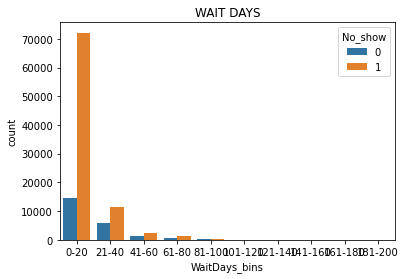

In [111]:
#plot for the wait days bins

plotting_2(show.WaitDays_bins, "WAIT DAYS");

There's no significant difference between the number of people that showed up and the number of people that didn't with respect to the number of days they waited before their apppointments.

**Does Age affect how a patient shows up?**

In [112]:
#create Age bins for this analysis

show["Age_bins"] = pd.qcut(show.Age, 5, labels = ["0 - 12", "13 - 29", "30 - 44", "45 - 58", "59 - 115"])

In [113]:
show.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitDays,Appointment_DOW,WaitDays_bins,Age_bins
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,Friday,0-20,59 - 115
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,Friday,0-20,45 - 58
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,Friday,0-20,59 - 115


Now, lets see how different age groups showed up for their appointment

C:\Users\User\anaconda3\envs\portfolio_projects\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


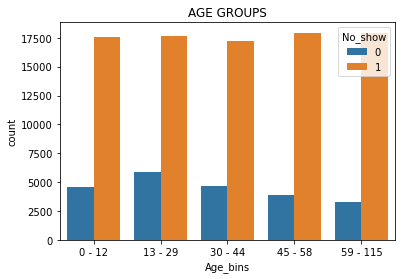

In [114]:
#we'll do this by using the function we defined earlier

plotting_2(show.Age_bins, "AGE GROUPS");

From this, we can see that more people within the ages of 13-29 miss their appointments as compared to the other age groups `

**Does being on scholarship increase the chances of a patient showing up?**

C:\Users\User\anaconda3\envs\portfolio_projects\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


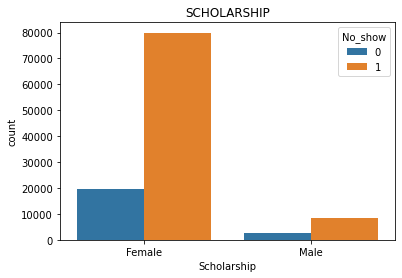

In [115]:
#we'll plot this using the function we defined earlier

plotting(show.Scholarship, "SCHOLARSHIP")
x_ticks_labels=['No Scholarship', 'Scholarship']

Now, lets see how different type of patients react to scholarships

**Do hypertensive patients show up more when they're on scholarship?**

In [116]:
# Hypertensive patients

sch_hyper = pd.pivot_table(data = show, index = ["Scholarship", "Hypertension"], values = "No_show")
round(sch_hyper * 100, 2)

No_show
Scholarship Hypertension         
0           0               79.51
            1               82.93
1           0               75.43
            1               80.25

Scholarships does not really have an impact on how hypertensive patients keep to appointments

**Do diabetic patients show up more when they're on scholarship?**

In [117]:
# Diabetic patients

sch_dia = pd.pivot_table(data = show, index = ["Scholarship", "Diabetes"], values = "No_show")
round(sch_dia * 100, 2)

No_show
Scholarship Diabetes         
0           0           80.03
            1           82.28
1           0           76.15
            1           78.38

More diabetic patients keep to their appointments when they are not on Scholarships (the difference isn't too much though)

**Do alcoholic patients show up more when they're on scholarship?**

In [118]:
# Alcoholic patients 

sch_alc = pd.pivot_table(data = show, index = ["Scholarship", "Alcoholism"], values = "No_show")
round(sch_alc * 100, 2)

No_show
Scholarship Alcoholism         
0           0             80.16
            1             81.36
1           0             76.49
            1             71.78

Alcoholic patients on scholarship do not show up as much as the the alcoholic patients that are not on scholarship

**Do handicaped patients show up more when they're on scholarship?**

In [119]:
# Handicaped patients

sch_hand = pd.pivot_table(data = show, index = ["Scholarship", "Handicap"], values = "No_show")
round(sch_hand * 100, 2)

No_show
Scholarship Handicap         
0           0           80.16
            1           81.71
1           0           76.13
            1           84.27

Handicapped patients on scholarship tend to keep to appointment more than those that are not on scholarship 

Now, lets see the Neighbourhoods that keep to appointment more 

In [120]:
neigh = pd.pivot_table(data = show, index = ["Neighbourhood"], values = "No_show")
result = neigh.sort_values(('No_show'), ascending=False).head(3)
round(result * 100, 2)

,No_show
Neighbourhood,
PARQUE INDUSTRIAL,100.00
ILHA DO BOI,91.43
AEROPORTO,87.50


PARQUE INDUSTRIAL had 100% show-rate!!!! 

**Does recieving SMS increase the chances of a patient showing up?**

C:\Users\User\anaconda3\envs\portfolio_projects\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


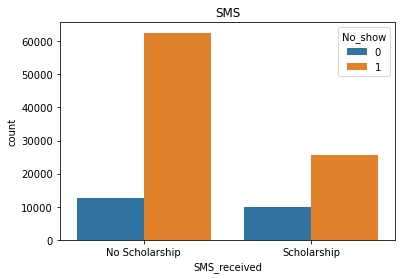

In [121]:
#we'll do this using the function we created earlier 

plotting(show.SMS_received, "SMS")
x_ticks_labels=['No SMS', 'SMS']

Taking into condideration the fact that the number of people that were not sent SMS is a lot larger than the number of people that were sent SMS, we can conclude that patients do not show up when they're sent SMS as compared to when no SMS is sent. 

This is counter intuitive but then it is possible that SMS was sent to only patients that have not kept to their appointment over a long period of time and they still didn't show up after the SMS was sent

**Does setting appointments on particular days increase the chances of a patient showing up?**

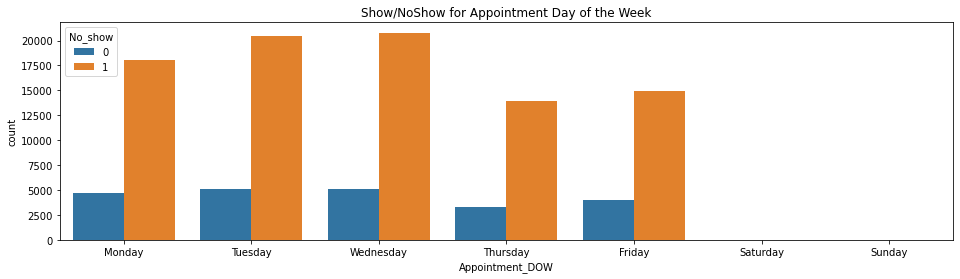

In [122]:
orderly = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(16,4))
appo = sns.countplot(x=show.Appointment_DOW, hue=show.No_show, order = orderly)
appo.set_title("Show/NoShow for Appointment Day of the Week")
plt.show()

Very little amount of appointments were booked for Saturday and Sunday. Apart from this, the days of the week does not affect the rate of show-up

Lastly, let's see the relationship between Scheduled Day and No_show

<AxesSubplot:xlabel='ScheduledDay', ylabel='No_show'>

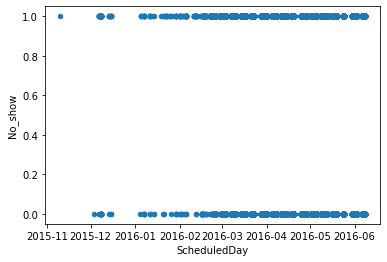

In [123]:
show.plot(x = 'ScheduledDay', y = 'No_show', kind = 'scatter')

No relationship between Scheduled day and No_show

### CONCLUSION 

- Gender on it's own does not determine if a patient shows up for their appointment or not.

- Males show up for their appointments more than females if they have been diagonized with alcoholism.

- Patients within the ages of 13-29 miss their appointments more than patients within other age groups. However, patients from 59 years and above take their appointmentss more seriously. 

- Scholarship led to a positive impact when the patient was either diabetic or handicaped. However, it led to a negative impact when the patient was alcoholic

- Sending SMS to patients had a negative impact. This is counter-intuitive but then it is possible that SMS was sent to patients only when they missed their appointments. 

### LIMITATIONS

- The location of the patients was not provided. This would have helped to show if patents were missing their appointments due to distance

- The data was collected for just 3 months. If data from other months were provided, it'd be possible to determine if there were months when most of the patients missed their appointments. 

- The time of the appointment was not properly given. If the time of the appointment was properly given, it'd be possible to determine if there was a particular time of the day when patients missed their appoimtments the most. 